In [1]:
import torch
import matplotlib.pyplot as plt
from models import MemNet
from LaMemDataset import LaMemEvalDataset
from torchvision import transforms
import numpy as np
import PIL.Image
from PIL import Image
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor
from matplotlib.colors import LinearSegmentedColormap

import pandas as pd

from layer_activity import features

import torchvision.models as Alexnet
from torchvision import transforms

import torch
import torchvision.models as models

from scipy import stats

In [2]:
#MEMNET
model_memnet = MemNet()
checkpoint_memnet = torch.utils.model_zoo.load_url("https://github.com/andrewrkeyes/Memnet-Pytorch-Model/raw/master/model.ckpt")
model_memnet.load_state_dict(checkpoint_memnet["state_dict"])

#ALEXNET
model_alexnet = Alexnet.alexnet(pretrained=True)

#RESNET15
model_resnet18 = models.resnet18(pretrained=True)

#RESNET50
model_resnet50 = models.resnet50(pretrained=True)

#RESNET101
model_resnet101 = models.resnet101(pretrained=True)

#VGG16
model_vgg16 = models.vgg16(pretrained=True)

#VGG19
model_vgg19 = models.vgg19(pretrained=True)

#Googlenet
model_googlenet = models.googlenet(pretrained=True)

#Inception3
model_inception = models.inception_v3(pretrained=True)

#Densenet
model_densenet = models.densenet121(pretrained=True)

#MobileNet
model_mobilenet_v2 = models.mobilenet_v2(pretrained=True)

#SqueezeNet 
model_squeezenet = models.squeezenet1_0(pretrained=True)

#ShuffleNetV2 
model_shufflenet_v2 = models.shufflenet_v2_x1_0(pretrained=True)

#MNASNet 
model_mnasnet = models.mnasnet1_0(pretrained=True)

#ResNeXt 
model_resnext = models.resnext50_32x4d(pretrained=True)

#Wideresnet
model_wide_resnet = models.wide_resnet50_2(pretrained=True)



/Users/ramahuja/anaconda3/envs/feature/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ramahuja/anaconda3/envs/feature/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/ramahuja/anaconda3/envs/feature/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You 

In [3]:
#models = [model_memnet,model_alexnet,model_resnet18,model_resnet50,model_resnet101,model_vgg16, model_vgg19]

In [4]:
layer_Memnet = model_memnet.eval()
nodes_Memnet, _ = get_graph_node_names(layer_Memnet)
print (nodes_Memnet)

['x', 'conv1', 'relu1', 'pool1', 'norm1', 'conv2', 'relu2', 'pool2', 'norm2', 'conv3', 'relu3', 'conv4', 'relu4', 'conv5', 'relu5', 'pool5', 'getattr', 'getitem', 'view', 'fc6', 'relu6', 'drop6', 'fc7', 'relu7', 'drop7', 'fc8_euclidean']


In [5]:
layer_Alexnet = model_alexnet.eval()
nodes_Alexnet, _ = get_graph_node_names(layer_Alexnet)
print (nodes_Alexnet )

['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5', 'classifier.6']


/Users/ramahuja/anaconda3/envs/feature/lib/python3.8/site-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/Users/ramahuja/anaconda3/envs/feature/lib/python3.8/site-packages/torch/overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
/Users/ramahuja/anaconda3/envs/feature/lib/python3.8/site-packages/torch/overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
/Users/ramahuja/anaconda3/envs/feature/lib/python3.8/site-packages/torch/overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'
  torch.has_mkldnn,


In [6]:
layer_resnet18 = model_resnet18.eval()
nodes_resnet18, _ = get_graph_node_names(layer_resnet18)
print (nodes_resnet18)

['x', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.add', 'layer1.0.relu_1', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.add', 'layer1.1.relu_1', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.0.add', 'layer2.0.relu_1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.add', 'layer2.1.relu_1', 'layer3.0.conv1', 'layer3.0.bn1', 'layer3.0.relu', 'layer3.0.conv2', 'layer3.0.bn2', 'layer3.0.downsample.0', 'layer3.0.downsample.1', 'layer3.0.add', 'layer3.0.relu_1', 'layer3.1.conv1', 'layer3.1.bn1', 'layer3.1.relu', 'layer3.1.conv2', 'layer3.1.bn2', 'layer3.1.add', 'layer3.1.relu_1', 'layer4.0.conv1', 'layer4.0.bn1', 'layer4.0.relu', 'layer4.0.conv2', 'layer4.0.bn2', 'layer4.0.downsample.0', 'layer4.0.downsample.1', 'lay

In [7]:
layer_resnet50 = model_resnet50.eval()
nodes_resnet50, _ = get_graph_node_names(layer_resnet50)
print (nodes_resnet50)

index = nodes_resnet50.index('layer3.2.bn1')
print(index)

['x', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.relu_1', 'layer1.0.conv3', 'layer1.0.bn3', 'layer1.0.downsample.0', 'layer1.0.downsample.1', 'layer1.0.add', 'layer1.0.relu_2', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.relu_1', 'layer1.1.conv3', 'layer1.1.bn3', 'layer1.1.add', 'layer1.1.relu_2', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.relu', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.relu_1', 'layer1.2.conv3', 'layer1.2.bn3', 'layer1.2.add', 'layer1.2.relu_2', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.relu_1', 'layer2.0.conv3', 'layer2.0.bn3', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.0.add', 'layer2.0.relu_2', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.relu_1', 'layer2.1.conv3', 'layer2.1.bn3', 'layer2.1.add', 'layer2.1.rel

In [8]:
layer_resnet101 = model_resnet101.eval()
nodes_resnet101, _ = get_graph_node_names(layer_resnet101)
print (nodes_resnet101)


index = nodes_resnet101.index('layer3.2.bn1')
print(index)

['x', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.relu_1', 'layer1.0.conv3', 'layer1.0.bn3', 'layer1.0.downsample.0', 'layer1.0.downsample.1', 'layer1.0.add', 'layer1.0.relu_2', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.relu_1', 'layer1.1.conv3', 'layer1.1.bn3', 'layer1.1.add', 'layer1.1.relu_2', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.relu', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.relu_1', 'layer1.2.conv3', 'layer1.2.bn3', 'layer1.2.add', 'layer1.2.relu_2', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.relu_1', 'layer2.0.conv3', 'layer2.0.bn3', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.0.add', 'layer2.0.relu_2', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.relu_1', 'layer2.1.conv3', 'layer2.1.bn3', 'layer2.1.add', 'layer2.1.rel

In [9]:
layer_vgg16= model_vgg16.eval()
nodes_vgg16, _ = get_graph_node_names(layer_vgg16)
print (nodes_vgg16)

['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'features.13', 'features.14', 'features.15', 'features.16', 'features.17', 'features.18', 'features.19', 'features.20', 'features.21', 'features.22', 'features.23', 'features.24', 'features.25', 'features.26', 'features.27', 'features.28', 'features.29', 'features.30', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5', 'classifier.6']


In [10]:
layer_vgg19= model_vgg19.eval()
nodes_vgg19, _ = get_graph_node_names(layer_vgg19)
print (nodes_vgg19)

['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'features.13', 'features.14', 'features.15', 'features.16', 'features.17', 'features.18', 'features.19', 'features.20', 'features.21', 'features.22', 'features.23', 'features.24', 'features.25', 'features.26', 'features.27', 'features.28', 'features.29', 'features.30', 'features.31', 'features.32', 'features.33', 'features.34', 'features.35', 'features.36', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5', 'classifier.6']


In [11]:
layer_googlenet= model_googlenet.eval()
nodes_googlenet, _ = get_graph_node_names(layer_googlenet)
print (nodes_googlenet)

['x', 'getitem', 'unsqueeze', 'mul', 'add', 'getitem_1', 'unsqueeze_1', 'mul_1', 'add_1', 'getitem_2', 'unsqueeze_2', 'mul_2', 'add_2', 'cat', 'conv1.conv', 'conv1.bn', 'conv1.relu', 'maxpool1', 'conv2.conv', 'conv2.bn', 'conv2.relu', 'conv3.conv', 'conv3.bn', 'conv3.relu', 'maxpool2', 'inception3a.branch1.conv', 'inception3a.branch1.bn', 'inception3a.branch1.relu', 'inception3a.branch2.0.conv', 'inception3a.branch2.0.bn', 'inception3a.branch2.0.relu', 'inception3a.branch2.1.conv', 'inception3a.branch2.1.bn', 'inception3a.branch2.1.relu', 'inception3a.branch3.0.conv', 'inception3a.branch3.0.bn', 'inception3a.branch3.0.relu', 'inception3a.branch3.1.conv', 'inception3a.branch3.1.bn', 'inception3a.branch3.1.relu', 'inception3a.branch4.0', 'inception3a.branch4.1.conv', 'inception3a.branch4.1.bn', 'inception3a.branch4.1.relu', 'inception3a.cat', 'inception3b.branch1.conv', 'inception3b.branch1.bn', 'inception3b.branch1.relu', 'inception3b.branch2.0.conv', 'inception3b.branch2.0.bn', 'incept

In [12]:
layer_inception= model_inception.eval()
nodes_inception, _ = get_graph_node_names(layer_inception)
print (nodes_inception)

['x', 'getitem', 'unsqueeze', 'mul', 'add', 'getitem_1', 'unsqueeze_1', 'mul_1', 'add_1', 'getitem_2', 'unsqueeze_2', 'mul_2', 'add_2', 'cat', 'Conv2d_1a_3x3.conv', 'Conv2d_1a_3x3.bn', 'Conv2d_1a_3x3.relu', 'Conv2d_2a_3x3.conv', 'Conv2d_2a_3x3.bn', 'Conv2d_2a_3x3.relu', 'Conv2d_2b_3x3.conv', 'Conv2d_2b_3x3.bn', 'Conv2d_2b_3x3.relu', 'maxpool1', 'Conv2d_3b_1x1.conv', 'Conv2d_3b_1x1.bn', 'Conv2d_3b_1x1.relu', 'Conv2d_4a_3x3.conv', 'Conv2d_4a_3x3.bn', 'Conv2d_4a_3x3.relu', 'maxpool2', 'Mixed_5b.branch1x1.conv', 'Mixed_5b.branch1x1.bn', 'Mixed_5b.branch1x1.relu', 'Mixed_5b.branch5x5_1.conv', 'Mixed_5b.branch5x5_1.bn', 'Mixed_5b.branch5x5_1.relu', 'Mixed_5b.branch5x5_2.conv', 'Mixed_5b.branch5x5_2.bn', 'Mixed_5b.branch5x5_2.relu', 'Mixed_5b.branch3x3dbl_1.conv', 'Mixed_5b.branch3x3dbl_1.bn', 'Mixed_5b.branch3x3dbl_1.relu', 'Mixed_5b.branch3x3dbl_2.conv', 'Mixed_5b.branch3x3dbl_2.bn', 'Mixed_5b.branch3x3dbl_2.relu', 'Mixed_5b.branch3x3dbl_3.conv', 'Mixed_5b.branch3x3dbl_3.bn', 'Mixed_5b.bran

/Users/ramahuja/anaconda3/envs/feature/lib/python3.8/site-packages/torchvision/models/feature_extraction.py:174: UserWarning: NOTE: The nodes obtained by tracing the model in eval mode are a subsequence of those obtained in train mode. When choosing nodes for feature extraction, you may need to specify output nodes for train and eval mode separately.
  warnings.warn(msg + suggestion_msg)


In [13]:
layer_densenet= model_densenet.eval()
nodes_densenet, _ = get_graph_node_names(layer_densenet)
print (nodes_densenet)

['x', 'features.conv0', 'features.norm0', 'features.relu0', 'features.pool0', 'features.denseblock1.denselayer1.cat', 'features.denseblock1.denselayer1.norm1', 'features.denseblock1.denselayer1.relu1', 'features.denseblock1.denselayer1.conv1', 'features.denseblock1.denselayer1.norm2', 'features.denseblock1.denselayer1.relu2', 'features.denseblock1.denselayer1.conv2', 'features.denseblock1.denselayer2.cat', 'features.denseblock1.denselayer2.norm1', 'features.denseblock1.denselayer2.relu1', 'features.denseblock1.denselayer2.conv1', 'features.denseblock1.denselayer2.norm2', 'features.denseblock1.denselayer2.relu2', 'features.denseblock1.denselayer2.conv2', 'features.denseblock1.denselayer3.cat', 'features.denseblock1.denselayer3.norm1', 'features.denseblock1.denselayer3.relu1', 'features.denseblock1.denselayer3.conv1', 'features.denseblock1.denselayer3.norm2', 'features.denseblock1.denselayer3.relu2', 'features.denseblock1.denselayer3.conv2', 'features.denseblock1.denselayer4.cat', 'featu

In [14]:
layer_mobilenet_v2= model_mobilenet_v2.eval()
nodes_mobilenet_v2, _ = get_graph_node_names(layer_mobilenet_v2)
print (nodes_mobilenet_v2)

index = nodes_mobilenet_v2.index('features.12.conv.2')
print(index)


['x', 'features.0', 'features.1.conv.0', 'features.1.conv.1', 'features.1.conv.2', 'features.2.conv.0', 'features.2.conv.1', 'features.2.conv.2', 'features.2.conv.3', 'features.3.conv.0', 'features.3.conv.1', 'features.3.conv.2', 'features.3.conv.3', 'features.3.add', 'features.4.conv.0', 'features.4.conv.1', 'features.4.conv.2', 'features.4.conv.3', 'features.5.conv.0', 'features.5.conv.1', 'features.5.conv.2', 'features.5.conv.3', 'features.5.add', 'features.6.conv.0', 'features.6.conv.1', 'features.6.conv.2', 'features.6.conv.3', 'features.6.add', 'features.7.conv.0', 'features.7.conv.1', 'features.7.conv.2', 'features.7.conv.3', 'features.8.conv.0', 'features.8.conv.1', 'features.8.conv.2', 'features.8.conv.3', 'features.8.add', 'features.9.conv.0', 'features.9.conv.1', 'features.9.conv.2', 'features.9.conv.3', 'features.9.add', 'features.10.conv.0', 'features.10.conv.1', 'features.10.conv.2', 'features.10.conv.3', 'features.10.add', 'features.11.conv.0', 'features.11.conv.1', 'fea

In [15]:
layer_squeezenet= model_squeezenet.eval()
nodes_squeezenet, _ = get_graph_node_names(layer_squeezenet)
print (nodes_squeezenet)

['x', 'features.0', 'features.1', 'features.2', 'features.3.squeeze', 'features.3.squeeze_activation', 'features.3.expand1x1', 'features.3.expand1x1_activation', 'features.3.expand3x3', 'features.3.expand3x3_activation', 'features.3.cat', 'features.4.squeeze', 'features.4.squeeze_activation', 'features.4.expand1x1', 'features.4.expand1x1_activation', 'features.4.expand3x3', 'features.4.expand3x3_activation', 'features.4.cat', 'features.5.squeeze', 'features.5.squeeze_activation', 'features.5.expand1x1', 'features.5.expand1x1_activation', 'features.5.expand3x3', 'features.5.expand3x3_activation', 'features.5.cat', 'features.6', 'features.7.squeeze', 'features.7.squeeze_activation', 'features.7.expand1x1', 'features.7.expand1x1_activation', 'features.7.expand3x3', 'features.7.expand3x3_activation', 'features.7.cat', 'features.8.squeeze', 'features.8.squeeze_activation', 'features.8.expand1x1', 'features.8.expand1x1_activation', 'features.8.expand3x3', 'features.8.expand3x3_activation', '

In [16]:
layer_shufflenet_v2= model_shufflenet_v2.eval()
nodes_shufflenet_v2, _ = get_graph_node_names(layer_shufflenet_v2)
print (nodes_shufflenet_v2)

['x', 'conv1.0', 'conv1.1', 'conv1.2', 'maxpool', 'stage2.0.branch1.0', 'stage2.0.branch1.1', 'stage2.0.branch1.2', 'stage2.0.branch1.3', 'stage2.0.branch1.4', 'stage2.0.branch2.0', 'stage2.0.branch2.1', 'stage2.0.branch2.2', 'stage2.0.branch2.3', 'stage2.0.branch2.4', 'stage2.0.branch2.5', 'stage2.0.branch2.6', 'stage2.0.branch2.7', 'stage2.0.cat', 'stage2.0.size', 'stage2.0.getitem', 'stage2.0.getitem_1', 'stage2.0.getitem_2', 'stage2.0.getitem_3', 'stage2.0.floordiv', 'stage2.0.view', 'stage2.0.transpose', 'stage2.0.contiguous', 'stage2.0.view_1', 'stage2.1.chunk', 'stage2.1.getitem', 'stage2.1.getitem_1', 'stage2.1.branch2.0', 'stage2.1.branch2.1', 'stage2.1.branch2.2', 'stage2.1.branch2.3', 'stage2.1.branch2.4', 'stage2.1.branch2.5', 'stage2.1.branch2.6', 'stage2.1.branch2.7', 'stage2.1.cat', 'stage2.1.size', 'stage2.1.getitem_2', 'stage2.1.getitem_3', 'stage2.1.getitem_4', 'stage2.1.getitem_5', 'stage2.1.floordiv', 'stage2.1.view', 'stage2.1.transpose', 'stage2.1.contiguous', 'st

In [17]:
layer_mnasnet= model_mnasnet.eval()
nodes_mnasnet, _ = get_graph_node_names(layer_mnasnet)
print (nodes_mnasnet)

['x', 'layers.0', 'layers.1', 'layers.2', 'layers.3', 'layers.4', 'layers.5', 'layers.6', 'layers.7', 'layers.8.0.layers.0', 'layers.8.0.layers.1', 'layers.8.0.layers.2', 'layers.8.0.layers.3', 'layers.8.0.layers.4', 'layers.8.0.layers.5', 'layers.8.0.layers.6', 'layers.8.0.layers.7', 'layers.8.1.layers.0', 'layers.8.1.layers.1', 'layers.8.1.layers.2', 'layers.8.1.layers.3', 'layers.8.1.layers.4', 'layers.8.1.layers.5', 'layers.8.1.layers.6', 'layers.8.1.layers.7', 'layers.8.1.add', 'layers.8.2.layers.0', 'layers.8.2.layers.1', 'layers.8.2.layers.2', 'layers.8.2.layers.3', 'layers.8.2.layers.4', 'layers.8.2.layers.5', 'layers.8.2.layers.6', 'layers.8.2.layers.7', 'layers.8.2.add', 'layers.9.0.layers.0', 'layers.9.0.layers.1', 'layers.9.0.layers.2', 'layers.9.0.layers.3', 'layers.9.0.layers.4', 'layers.9.0.layers.5', 'layers.9.0.layers.6', 'layers.9.0.layers.7', 'layers.9.1.layers.0', 'layers.9.1.layers.1', 'layers.9.1.layers.2', 'layers.9.1.layers.3', 'layers.9.1.layers.4', 'layers.9.1

In [18]:
layer_resnext= model_resnext.eval()
nodes_resnext, _ = get_graph_node_names(layer_resnext)
print (nodes_resnext)

['x', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.relu_1', 'layer1.0.conv3', 'layer1.0.bn3', 'layer1.0.downsample.0', 'layer1.0.downsample.1', 'layer1.0.add', 'layer1.0.relu_2', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.relu_1', 'layer1.1.conv3', 'layer1.1.bn3', 'layer1.1.add', 'layer1.1.relu_2', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.relu', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.relu_1', 'layer1.2.conv3', 'layer1.2.bn3', 'layer1.2.add', 'layer1.2.relu_2', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.relu_1', 'layer2.0.conv3', 'layer2.0.bn3', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.0.add', 'layer2.0.relu_2', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.relu_1', 'layer2.1.conv3', 'layer2.1.bn3', 'layer2.1.add', 'layer2.1.rel

In [19]:
layer_wide_resnet= model_wide_resnet.eval()
nodes_wide_resnet, _ = get_graph_node_names(layer_wide_resnet)
print (nodes_wide_resnet)

['x', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.relu_1', 'layer1.0.conv3', 'layer1.0.bn3', 'layer1.0.downsample.0', 'layer1.0.downsample.1', 'layer1.0.add', 'layer1.0.relu_2', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.relu_1', 'layer1.1.conv3', 'layer1.1.bn3', 'layer1.1.add', 'layer1.1.relu_2', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.relu', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.relu_1', 'layer1.2.conv3', 'layer1.2.bn3', 'layer1.2.add', 'layer1.2.relu_2', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.relu_1', 'layer2.0.conv3', 'layer2.0.bn3', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.0.add', 'layer2.0.relu_2', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.relu_1', 'layer2.1.conv3', 'layer2.1.bn3', 'layer2.1.add', 'layer2.1.rel

In [20]:
index_of_fc7 = nodes_Memnet.index('fc7')
fc7_node = nodes_Memnet[index_of_fc7]
print (nodes_Memnet[index_of_fc7])
fc7_Memnet = features(fc7_node, layer_Memnet)
print (fc7_Memnet)

fc7
      /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                             -0.285041                                                                    
1                                             -0.228957                                                                    
2                                             -0.006291                                                                    
3                                             -0.027474                                                                    
4                                             -0.272830                                                                    
...                                                 ...                                                                    
4091                                          -0.145744                                                                    
4092

In [21]:

index_of_features_12 = nodes_Alexnet.index('features.12')
features_12_node = nodes_Alexnet[index_of_features_12]
feature_12_Alexnet = features(features_12_node, layer_Alexnet)

print (feature_12_Alexnet)

      /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                              0.000000                                                                    
1                                              0.000000                                                                    
2                                              0.000000                                                                    
3                                              0.000000                                                                    
4                                              0.000000                                                                    
...                                                 ...                                                                    
9211                                           0.332077                                                                    
9212    

In [22]:
index = nodes_resnet18.index('layer3.1.bn2')
node = nodes_resnet18[index]
print (nodes_resnet18[index])
ITlayer_resnet18 = features(node, layer_resnet18)
print (ITlayer_resnet18)




layer3.1.bn2
       /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                             -18.107691                                                                    
1                                             -23.756983                                                                    
2                                             -22.706919                                                                    
3                                             -23.825556                                                                    
4                                             -23.452791                                                                    
...                                                  ...                                                                    
57595                                         -19.403646                                                        

In [23]:
index_of_layer3_2_bn1 = nodes_resnet50.index('layer3.2.bn1')
layer3_2_bn1_node = nodes_resnet50[index_of_fc7]
print (nodes_resnet50[index_of_layer3_2_bn1])
layer3_2_bn1_resnet50 = features(layer3_2_bn1_node, layer_resnet50)
print (layer3_2_bn1_resnet50)

layer3.2.bn1
        /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                                8.189048                                                                    
1                                                0.000000                                                                    
2                                                2.368098                                                                    
3                                                3.199535                                                                    
4                                                0.000000                                                                    
...                                                   ...                                                                    
207931                                          17.256659                                                

In [24]:
index = nodes_resnet101.index('layer3.22.bn3')
node = nodes_resnet101[index]
print (nodes_resnet101[index])
ITlayer_resnet101 = features(node, layer_resnet101)
print (ITlayer_resnet101)

df = pd.DataFrame(ITlayer_resnet101)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/resnet101/ITlayer_resnet101.csv"
df.to_csv(csv_file_name, index=False)

layer3.22.bn3
        /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                               -0.948797                                                                    
1                                                1.783752                                                                    
2                                               -0.660972                                                                    
3                                               -0.384589                                                                    
4                                               -0.248762                                                                    
...                                                   ...                                                                    
230395                                         -11.117960                                               

In [25]:
index = nodes_vgg16.index('features.30')
node = nodes_vgg16[index]
print (nodes_vgg16[index])
ITlayer_vgg16 = features(node, layer_vgg16)
print (ITlayer_vgg16)

df = pd.DataFrame(ITlayer_vgg16)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/vgg16/ITlayer_vgg16.csv"
df.to_csv(csv_file_name, index=False)

features.30
       /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                                    0.0                                                                    
1                                                    0.0                                                                    
2                                                    0.0                                                                    
3                                                    0.0                                                                    
4                                                    0.0                                                                    
...                                                  ...                                                                    
25083                                                0.0                                                         

In [26]:
index = nodes_vgg19.index('features.36')
node = nodes_vgg19[index]
print (nodes_vgg19[index])
ITlayer_vgg19 = features(node, layer_vgg19)
print (ITlayer_vgg19)

df = pd.DataFrame(ITlayer_vgg19)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/vgg19/ITlayer_vgg19.csv"
df.to_csv(csv_file_name, index=False)

features.36
       /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                               0.000000                                                                    
1                                               0.000000                                                                    
2                                               0.000000                                                                    
3                                               0.000000                                                                    
4                                               0.000000                                                                    
...                                                  ...                                                                    
25083                                          15.937029                                                         

In [27]:
index = nodes_googlenet.index('inception5a.branch1.bn')
node = nodes_googlenet[index]
print (nodes_googlenet[index])
ITlayer_googlenet = features(node, layer_googlenet)
print (ITlayer_googlenet)

df = pd.DataFrame(ITlayer_googlenet)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/googlenet/ITlayer_googlenet.csv"
df.to_csv(csv_file_name, index=False)

inception5a.branch1.bn
       /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                              -4.989088                                                                    
1                                              -3.698785                                                                    
2                                              -4.208912                                                                    
3                                              -5.321703                                                                    
4                                              -5.189101                                                                    
...                                                  ...                                                                    
12539                                         -10.799461                                              

In [28]:
index = nodes_inception.index('Mixed_7a.branch3x3_1.bn')
node = nodes_inception[index]
print (nodes_inception[index])
ITlayer_inception = features(node, layer_inception)
print (ITlayer_inception)

df = pd.DataFrame(ITlayer_inception)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/inception/ITlayer_inception.csv"
df.to_csv(csv_file_name, index=False)

Mixed_7a.branch3x3_1.bn


/Users/ramahuja/anaconda3/envs/feature/lib/python3.8/site-packages/torchvision/models/feature_extraction.py:174: UserWarning: NOTE: The nodes obtained by tracing the model in eval mode are a subsequence of those obtained in train mode. When choosing nodes for feature extraction, you may need to specify output nodes for train and eval mode separately.
  warnings.warn(msg + suggestion_msg)


       /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                             -13.783566                                                                    
1                                             -12.341022                                                                    
2                                             -15.397404                                                                    
3                                             -20.834627                                                                    
4                                             -21.949793                                                                    
...                                                  ...                                                                    
27643                                          -3.904407                                                                    


In [29]:
index = nodes_densenet.index('adaptive_avg_pool2d')
node = nodes_densenet[index]
print (nodes_densenet[index])
ITlayer_densenet = features(node, layer_densenet)
print (ITlayer_densenet)

df = pd.DataFrame(ITlayer_densenet)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/densenet/ITlayer_densenet.csv"
df.to_csv(csv_file_name, index=False)

adaptive_avg_pool2d
      /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                              0.000093                                                                    
1                                              0.000600                                                                    
2                                              0.002303                                                                    
3                                              0.010570                                                                    
4                                              0.021403                                                                    
...                                                 ...                                                                    
1019                                           0.463709                                                         

In [31]:
index = nodes_mobilenet_v2.index('features.11.conv.0')
node = nodes_mobilenet_v2[index]
print (nodes_mobilenet_v2[index])
ITlayer_mobilenet_v2 = features(node, layer_mobilenet_v2)
print (ITlayer_mobilenet_v2)


df = pd.DataFrame(ITlayer_mobilenet_v2)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/mobilenet_v2/ITlayer_mobilenet_v2.csv"
df.to_csv(csv_file_name, index=False)

features.11.conv.0
       /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                               0.000000                                                                    
1                                               0.322762                                                                    
2                                               0.576877                                                                    
3                                               0.587397                                                                    
4                                               0.381692                                                                    
...                                                  ...                                                                    
86395                                           0.000000                                                  

In [32]:
index = nodes_squeezenet.index('features.12.expand3x3_activation')
node = nodes_squeezenet[index]
print (nodes_squeezenet[index])
ITlayer_squeezenet = features(node, layer_squeezenet)
print (ITlayer_squeezenet)

df = pd.DataFrame(ITlayer_squeezenet)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/squeezenet/ITlayer_squeezenet.csv"
df.to_csv(csv_file_name, index=False)

features.12.expand3x3_activation
       /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                                    0.0                                                                    
1                                                    0.0                                                                    
2                                                    0.0                                                                    
3                                                    0.0                                                                    
4                                                    0.0                                                                    
...                                                  ...                                                                    
43259                                                0.0                                    

In [33]:
index = nodes_shufflenet_v2.index('conv5.2')
node = nodes_shufflenet_v2[index]
print (nodes_shufflenet_v2[index])
ITlayer_shufflenet_v2 = features(node, layer_shufflenet_v2)
print (ITlayer_shufflenet_v2)

df = pd.DataFrame(ITlayer_shufflenet_v2)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/shufflenet_v2/ITlayer_shufflenet_v2.csv"
df.to_csv(csv_file_name, index=False)

conv5.2
       /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                                    0.0                                                                    
1                                                    0.0                                                                    
2                                                    0.0                                                                    
3                                                    0.0                                                                    
4                                                    0.0                                                                    
...                                                  ...                                                                    
65531                                                0.0                                                             

In [34]:
index = nodes_mnasnet.index('layers.16')
node = nodes_mnasnet[index]
print (nodes_mnasnet[index])
ITlayer_mnasnet = features(node, layer_mnasnet)
print (ITlayer_mnasnet)

df = pd.DataFrame(ITlayer_mnasnet)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/mnasnet/ITlayer_mnasnet.csv"
df.to_csv(csv_file_name, index=False)

layers.16
       /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                                    0.0                                                                    
1                                                    0.0                                                                    
2                                                    0.0                                                                    
3                                                    0.0                                                                    
4                                                    0.0                                                                    
...                                                  ...                                                                    
81915                                                0.0                                                           

In [35]:
index = nodes_resnext.index('layer3.3.relu_1')
node = nodes_resnext[index]
print (nodes_resnext[index])
ITlayer_resnext = features(node, layer_resnext)
print (ITlayer_resnext)

df = pd.DataFrame(ITlayer_resnext)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/resnext/ITlayer_resnext.csv"
df.to_csv(csv_file_name, index=False)


layer3.3.relu_1
        /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                               11.045553                                                                    
1                                               10.567049                                                                    
2                                                8.540202                                                                    
3                                                9.701693                                                                    
4                                               11.345939                                                                    
...                                                   ...                                                                    
115195                                           0.000000                                             

In [36]:
index = nodes_wide_resnet.index('layer3.3.bn2')
node = nodes_wide_resnet[index]
print (nodes_wide_resnet[index])
ITlayer_wide_resnet = features(node, layer_wide_resnet)
print (ITlayer_wide_resnet)

df = pd.DataFrame(ITlayer_wide_resnet)

# Save the DataFrame to a CSV file
csv_file_name = "/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/wide_resnet/ITlayer_wide_resnet.csv"
df.to_csv(csv_file_name, index=False)

layer3.3.bn2
        /Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/images/coco/coco200/im0.png  \
0                                               -9.389438                                                                    
1                                               -5.200644                                                                    
2                                               -2.299162                                                                    
3                                               -3.844237                                                                    
4                                               -4.168816                                                                    
...                                                   ...                                                                    
115195                                          -3.883684                                                

In [ ]:
import numpy as np
from scipy.spatial import distance
import pandas as pd
import math
import os
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from nilearn import image, datasets, plotting, masking

from rdm_plot_function import plot_rdm
from rdm_calc_function import activity_vector_rdm



In [ ]:
import pandas as pd

node_data = {
    'fc7_Memnet': fc7_Memnet,
    'classifier_5_Alexnet': feature_12_Alexnet,
    'avgpool_resnet18': ITlayer_resnet18,
    'avgpool_resnet50': layer3_2_bn1_resnet50,
    'avgpool_resnet101': ITlayer_resnet101,
    'classifier_5_vgg16': ITlayer_vgg16,
    'classifier_5_vgg19': ITlayer_vgg19,
    'avgpool_googlenet': ITlayer_googlenet,
    'avgpool_inception': ITlayer_inception,
    'adaptive_avg_pool2d_densenet': ITlayer_densenet,
    'adaptive_avg_pool2d_mobilenet_v2': ITlayer_mobilenet_v2,
    'mean_shufflenet_v2': ITlayer_shufflenet_v2,
    'avgpool_wide_resnet': ITlayer_wide_resnet,
    'classifier_2_squeezenet': ITlayer_squeezenet,
    'mean_mnasnet': ITlayer_mnasnet,
    'avgpool_resnext': ITlayer_resnext,
}

corr = []

for node, data_frame in node_data.items():
    activity_vectors_path = []

    for column in data_frame.columns:
        try:
            activity_vector = data_frame[column].astype(float).tolist()
            activity_vectors_path.append(activity_vector)
        except ValueError:
            pass

    rdm_data_path = activity_vector_rdm(activity_vectors_path)

    print("Correlation Dissimilarity Matrix for", node)
    corr.append(rdm_data_path)



Correlation Dissimilarity Matrix for fc7_Memnet
Correlation Dissimilarity Matrix for classifier_5_Alexnet
Correlation Dissimilarity Matrix for avgpool_resnet18
Correlation Dissimilarity Matrix for avgpool_resnet50
Correlation Dissimilarity Matrix for avgpool_resnet101
Correlation Dissimilarity Matrix for classifier_5_vgg16
Correlation Dissimilarity Matrix for classifier_5_vgg19
Correlation Dissimilarity Matrix for avgpool_googlenet
Correlation Dissimilarity Matrix for avgpool_inception
Correlation Dissimilarity Matrix for adaptive_avg_pool2d_densenet
Correlation Dissimilarity Matrix for adaptive_avg_pool2d_mobilenet_v2
Correlation Dissimilarity Matrix for mean_shufflenet_v2
Correlation Dissimilarity Matrix for avgpool_wide_resnet
Correlation Dissimilarity Matrix for classifier_2_squeezenet
Correlation Dissimilarity Matrix for mean_mnasnet
Correlation Dissimilarity Matrix for avgpool_resnext


[0.09590475153577621, -0.03539452102111126, 0.16936597076946117, 0.5037768595020198, 0.43442135422627176, 0.18282746587585053, 0.2075586593236855, 0.3225718213536482, 0.24911860678713807, 0.12937463629451135, 0.1345481410624762, 0.45103148686236433, 0.025416130042616336, 0.23889296171041646, 0.4076387079420115, 0.5808463254245293, 0.057802868891516576, 0.0952413525516665, 0.31064206524522764, 0.17221461889490502, 0.05273896963497826, 0.06794406187594161, 0.613225225575006, 0.634417739601389, 0.0819714564088334, 0.4835768848948534, 0.31358571108379013, 0.2064528356644547, 0.009309767757427107, 0.07910401804102976, 0.4712188247060358, 0.0577179918810733, -0.07167221886706329, 0.10436465139667797, 0.642028605241581, 0.23770629124066162, -0.023633450567974543, 0.6397765865306627, -0.008466538916939666, 0.2207933887359362, 0.19629762987918298, 0.380311668194961, 0.39240093446252167, 0.23515945583511713, 0.2917475320340932, 0.6282141392757052, 0.875422250794249, 0.14126256826286063, 0.235021

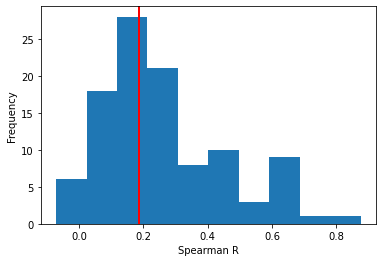

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from upper_triangle import upper 
import numpy as np  

def calculate_average(lst):
    total = sum(lst)
    count = len(lst)
    return total / count

results = []
for i in range(1, len(corr)):
    for j in range(i + 1, len(corr)):
        spearman_r, _ = spearmanr(upper(corr[i]), upper(corr[j]))
        results.append(spearman_r)

memnet_corr = []
for i in range(1, len(corr)):
    spearman_r, _ = spearmanr(upper(corr[0]), upper(corr[i]))
    memnet_corr.append(spearman_r)

average = calculate_average(memnet_corr)

print(results)

plt.hist(results)
plt.axvline(x=average, color='red', linestyle='solid', linewidth=2)
plt.xlabel('Spearman R')
plt.ylabel('Frequency')

plt.show()


In [ ]:
print (average)

0.18590949933112094


In [ ]:
average_results = calculate_average(results)

print (average_results)

0.2609210297995917


In [ ]:
import numpy as np

def standard_error(data):
    """Return the standard error of the mean of the data."""
    n = len(data)
    if n <= 1:
        raise ValueError("Standard error requires at least two data points.")
    return np.std(data, ddof=1) / np.sqrt(n)

se = standard_error(memnet_corr)
se_results = standard_error(results)

print (se)
print (se_results)

0.03512618832479384
0.018792317519090662


In [ ]:
memnet_corr = []

memnet_corr_ses = []

for i in range(1, len(corr)):
    current_round_corr = []
    for j in range(1, len(corr)):
        if i != j:  # Skip the model to exclude
                spearman_r, _ = spearmanr(upper(corr[0]), upper(corr[j]))
                current_round_corr.append(spearman_r)
    memnet_corr.append(calculate_average(current_round_corr))
    memnet_corr_ses.append(standard_error(current_round_corr))
print (memnet_corr)
print (memnet_corr_ses)

[0.17181358430515972, 0.1944816943623702, 0.20399117874218042, 0.18640886131029719, 0.1733012578724414, 0.1720316241035669, 0.18894009588828706, 0.18969965061337404, 0.1761981165581871, 0.18589899466370094, 0.1894039859835282, 0.19169151164595855, 0.17937300106415804, 0.19872407083137533, 0.18668486202222878]
[0.03456021978111481, 0.03659077088202037, 0.03234849852486113, 0.03772776590017526, 0.035217150873301864, 0.034661889159043786, 0.03759088357265591, 0.03751128844689266, 0.036260884056214186, 0.03773157720430002, 0.037544399396914514, 0.037216891943660416, 0.037072537471539505, 0.03513111480024756, 0.037722385502400015]


In [ ]:
other_models = []
other_models_ses = []
for i in range(1, len(corr)):
    current_round_other_models = []
    for j in range(1, len(corr)):
        if i != j:  # Skip the model to exclude
            spearman_r, _ = spearmanr(upper(corr[i]), upper(corr[j]))
            current_round_other_models.append(spearman_r)
    average_corr = calculate_average(current_round_other_models)
    other_models.append(average_corr)
    other_models_ses.append(standard_error(current_round_other_models))


print(other_models)
print(other_models_ses)

[0.22210102316608027, 0.2834107671114589, 0.19401082507346618, 0.37571551116779683, 0.24458216190512752, 0.24057491613400067, 0.2895071316611566, 0.20915330873096077, 0.16185254122941548, 0.2361490269189397, 0.3952475826676588, 0.340494731184104, 0.19204863894908386, 0.22238583561241793, 0.30658144548220856]
[0.04255892018543024, 0.05983702346369749, 0.06669114165262713, 0.061768658405263153, 0.046852064103168875, 0.04205526575985165, 0.03788865449670537, 0.026644917456852914, 0.02958899711126081, 0.02692966619668961, 0.05622154789756826, 0.06599770750123926, 0.04005918465828336, 0.060986393433023374, 0.05497047546344711]


In [ ]:
import numpy as np
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(memnet_corr, other_models)

print("T-statistic:", t_stat)
print("p-value:", p_value)



T-statistic: -4.277328030261569
p-value: 0.0007664539482609871


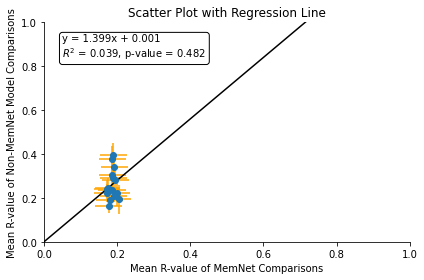

In [ ]:
# Perform linear regression
slope, intercept = np.polyfit(memnet_corr, other_models, 1)
regression_line = np.poly1d([slope, intercept])

# Define x-values for the regression line over the full axis range
x_values = np.linspace(0, 1, 100)  # 100 points between 0 and 1

# Create scatter plot with error bars
plt.errorbar(memnet_corr, other_models, xerr=memnet_corr_ses, yerr=other_models_ses, fmt='o', ecolor='orange')

# Plot the regression line over the defined range
plt.plot(x_values, regression_line(x_values), color='black', label='Regression Line')

# Title and labels
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Mean R-value of MemNet Comparisons')
plt.ylabel('Mean R-value of Non-MemNet Model Comparisons')

slope, intercept, r_value, p_value, std_err = stats.linregress(memnet_corr, other_models)

equation = f'y = {slope:.3f}x + {intercept:.3f}\n$R^2$ = {r_value**2:.3f}, p-value = {p_value:.3g}'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))


# Setting the x and y axis limits to 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Show the plot with a tight layout to ensure all data is visible
plt.tight_layout()
plt.show()

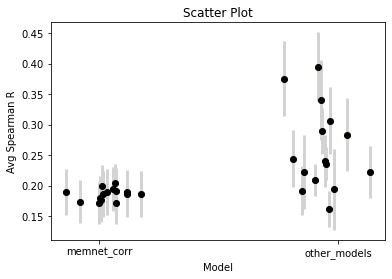

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['memnet_corr', 'other_models']
measurements = {
    'memnet_corr': memnet_corr,
    'other_models': other_models
}

errors = {
    'memnet_corr': memnet_corr_ses,
    'other_models': other_models_ses
}

# Create figure and axis
fig, ax = plt.subplots()

jitter_amount = 0.1
for i, category in enumerate(categories):
    x_values = np.random.normal(i, jitter_amount, size=len(measurements[category]))
    y_values = measurements[category]
    y_errors = errors[category]
    ax.scatter(x_values, y_values, alpha=0.5)
    
    # Add error bars
    ax.errorbar(x_values, y_values, yerr=y_errors, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

# Set the x-axis ticks to the middle of each category group
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)

# Title and labels
plt.title('Scatter Plot')
plt.xlabel('Model')
plt.ylabel('Avg Spearman R')

# Show the plot
plt.show()


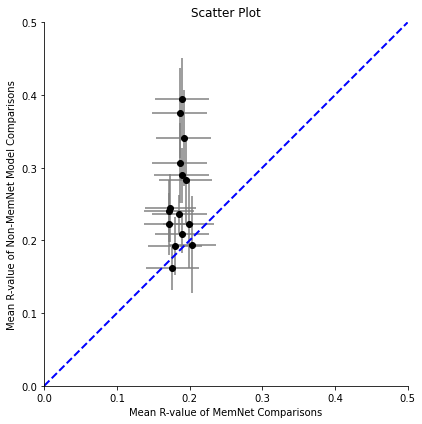

In [ ]:
fig_size = 6  # 6 inches by 6 inches square figure

# Create the figure with the desired size
plt.figure(figsize=(fig_size, fig_size))

# Create scatter plot with error bars
plt.errorbar(memnet_corr, other_models, xerr=memnet_corr_ses, yerr=other_models_ses, fmt='o', ecolor='grey', color='black')

# Title and labels
plt.title('Scatter Plot')
plt.xlabel('Mean R-value of MemNet Comparisons')
plt.ylabel('Mean R-value of Non-MemNet Model Comparisons')

# Remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.gca().set_aspect('equal', 'box')

plt.plot([0, 0.5], [0, 0.5], color='blue', linestyle='--', linewidth=2, label='x=y Line')

# Setting the x and y axis limits to 0 to 1
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)


# Show the plot with a tight layout to ensure all data is visible
plt.tight_layout()
plt.show()

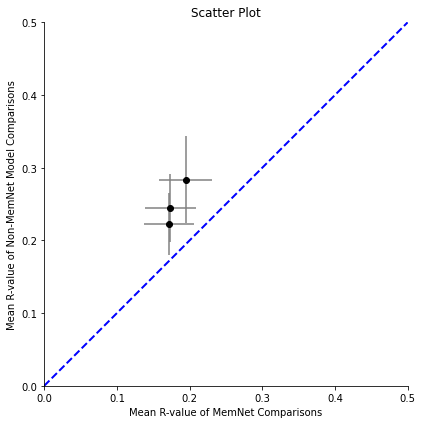

In [ ]:
ppt_memnet = [0.17181358430515972, 0.1944816943623702, 0.1733012578724414]
ppt_othermodel = [0.22210102316608027, 0.2834107671114589, 0.24458216190512752]
ppt_memnet_ses = [0.03456021978111481, 0.03659077088202037, 0.035217150873301864]
ppt_othermodel_ses = [0.04255892018543024, 0.05983702346369749, 0.046852064103168875]


fig_size = 6  # 6 inches by 6 inches square figure

# Create the figure with the desired size
plt.figure(figsize=(fig_size, fig_size))

# Create scatter plot with error bars
plt.errorbar(ppt_memnet, ppt_othermodel, xerr=ppt_memnet_ses, yerr=ppt_othermodel_ses, fmt='o', ecolor='grey', color='black')

# Title and labels
plt.title('Scatter Plot')
plt.xlabel('Mean R-value of MemNet Comparisons')
plt.ylabel('Mean R-value of Non-MemNet Model Comparisons')

# Remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.gca().set_aspect('equal', 'box')

plt.plot([0, 0.5], [0, 0.5], color='blue', linestyle='--', linewidth=2, label='x=y Line')

# Setting the x and y axis limits to 0 to 1
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)


# Show the plot with a tight layout to ensure all data is visible
plt.tight_layout()
plt.show()

In [ ]:
memnet_corr_avg = calculate_average(other_models)

print (memnet_corr_avg)

0.26092102979959175
